# 预备知识

## 数据操作

In [23]:
x = torch.arange(12)
y = torch.arange(12) # 采用基于CPU的计算 创建一个行向量x
y[1] = 5
y[6] = 11
print(x)
print(y)
print(x.size())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0,  5,  2,  3,  4,  5, 11,  7,  8,  9, 10, 11])
torch.Size([12])


In [24]:
# tensor中的元素总数
x.numel()

12

In [25]:
print(x.reshape(2,6))
print(x.reshape(3,-1))

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


我们不需要通过手动指定每个维度来改变形状。 也就是说，如果我们的目标形状是（高度,宽度）， 那么在知道宽度后，高度会被自动计算得出，不必我们自己做除法。 在上面的例子中，为了获得一个3行的矩阵，我们手动指定了它有3行和4列。 幸运的是，我们可以通过-1来调用此自动计算出维度的功能。 即我们可以用x.reshape(-1,4)或x.reshape(3,-1)来取代x.reshape(3,4)。

同样，我们可以创建一个形状为(2,3,4)的张量，其中所有元素都设置为1。代码如下：

In [26]:
print(torch.ones((2, 3, 4)))
torch.randn(3, 4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


tensor([[-0.5814,  0.3345, -0.3565,  0.6558],
        [ 1.6499,  0.5269, -0.2869,  1.7883],
        [-1.5049, -0.8539,  0.1361,  0.7198]])

有时我们想通过从某个特定的概率分布中随机采样来得到张量中每个元素的值。 例如，当我们构造数组来作为神经网络中的参数时，我们通常会随机初始化参数的值。 以下代码创建一个形状为（3,4）的张量。 其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。

我们还可以通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。 在这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [27]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

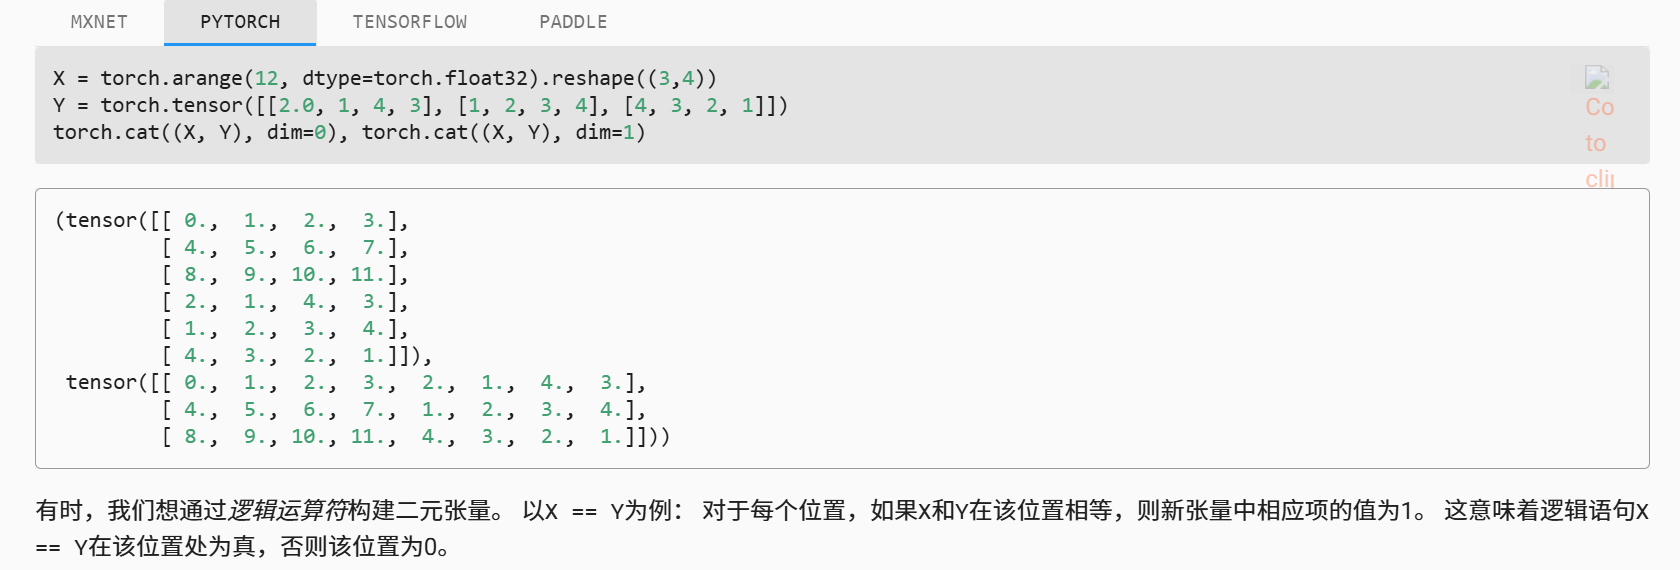

In [28]:
x==y

tensor([ True, False,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True])

In [29]:
x.sum()

tensor(66)

In [ ]:
# 广播机制

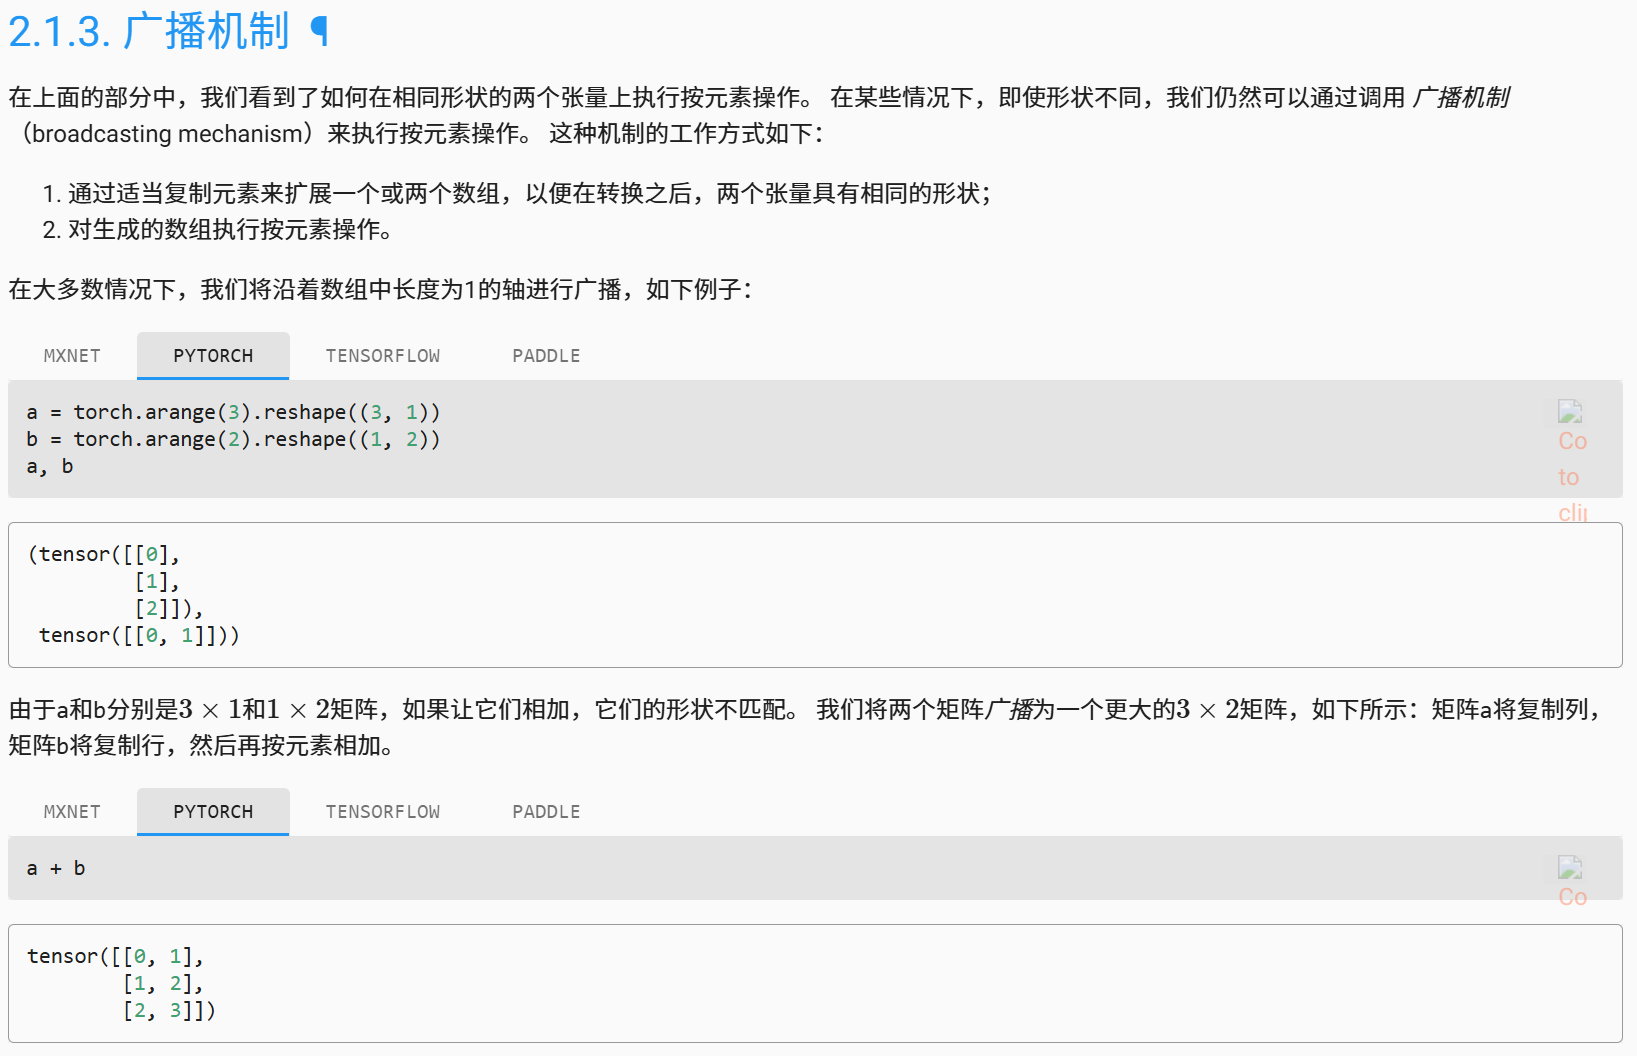

In [33]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
#torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)
print(X)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


就像在任何其他Python数组中一样，张量中的元素可以通过索引访问。 与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

如下所示，我们可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素：

In [39]:
X[-1],X[0:3] #左开右闭

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

## 关于节省内存

下面证明了*Y=Y+X* 中，结果是一块新分配的内存块,并且使用了广播机制。

In [6]:
import torch
Y = torch.ones(2,3)
print(Y)
X = torch.arange(2).reshape(2,1)  
print(X)
before = id(Y)
Y = Y + X
print(Y)
print(id(Y)==before)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0],
        [1]])
tensor([[1., 1., 1.],
        [2., 2., 2.]])
False


因为我们可能有数百兆的参数，并且在一秒内多次更新所有参数。我们不希望新的引用会指向其他位置（也可能是已经经过分配的位置，已经存在数据）。我们希望原地更新，保证内存可以最大化其使用效能。可以通过**切片？**来完成。

In [10]:
Z = torch.ones_like(Y) #Y的形状 ，对Z进行事先分配
Z1 = torch.ones_like(Y)
print('id(Z):',id(Z))
print('id(Z):',id(Z1))
Z1=X+Y
print('id(Z):',id(Z))
Z[:] = X+Y
print('id(Z):',id(Z))


id(Z): 1722733477376
id(Z): 1722733477456
id(Z): 1722733477376
id(Z): 1722733477376


达成上述操作的步骤有两个：一个是提前声明，另外是用索引。需要声明的是，X +=Y 与 X=X+Y是**不一样**的,X +=Y 与X[:]进行加法的操作等价。

## numpy与torch 对象的互换

他俩共享底层内存。操作方法是：

In [11]:
A=X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

要将大小为1的张量转换为Python标量，我们可以调用item函数或Python的内置函数。

In [12]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 课后题

1.运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

2.用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

In [17]:
x = torch.tensor([[1,8,6],[6,-7,1],[2,3,1]])
y = torch.arange(9).reshape(3,3) # 采用基于CPU的计算 创建一个行向量x
print(x>y)

tensor([[ True,  True,  True],
        [ True, False, False],
        [False, False, False]])


In [22]:
x = torch.ones(2,3,1)
print(x)
y = torch.ones(3,1)
print(y)
print(x+y)

tensor([[[1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.]]])
tensor([[1.],
        [1.],
        [1.]])
tensor([[[2.],
         [2.],
         [2.]],

        [[2.],
         [2.],
         [2.]]])


# 数据预处理

## 读取数据集

使用python创建一个csv。创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。 以其他格式存储的数据也可以通过类似的方式进行处理。下面我们将数据集按行写入CSV文件中。

In [4]:
import os
data = 'data_folder'
os.makedirs(os.path.join('E:\\pytorch',data),exist_ok = True)
data_file = os.path.join('E:\\pytorch',data,'house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
    f.write('NA,Pave,134000\n')
    f.write('3,NA,134000\n')

·os.makedirs()函数用于递归创建目录。这意味着，如果父目录不存在，os.makedirs()也会创建它们。例如，如果'..'（代表当前目录的上一级目录）中不存在'data'目录，这个函数就会创建它。

·os.path.join('..', 'data')是os.path模块的一个函数，用于将多个路径组件合并成一个路径。在这个例子中，它合并了'..'（当前目录的上一级目录）和'data'，生成了相对路径'../data'。

·exist_ok=True是一个关键字参数，它告诉os.makedirs()如果目标目录已经存在，不要抛出FileExistsError异常，而是忽略它。这是Python 3.2及以后版本中添加的功能，用于简化目录创建的代码，无需先检查目录是否存在。

## 处理缺失值

典型的方法包括插值法和删除法， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean()) #这样对于数据项较好解决，对于类别项无用
print(inputs)

对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。 缺少巷子类型的行会将“Alley_Pave”和“Alley_nan”分别设置为0和1。

In [ ]:
import pandas as pd
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)

In [ ]:
pd.get_dummies 是 Pandas 库中的一个函数，用于将分类变量转换为虚拟变量（或称为哑变量），这是进行机器学习和统计建模时常见的预处理步骤之一。
以下是这个函数如何工作的解释：

#### 函数解释

pd.get_dummies 函数：
这个函数用于将分类变量转换为虚拟变量。虚拟变量通常是二进制（0 或 1）变量，用于指示某个分类的存在或不存在。

inputs 参数：
这是你要转换的 DataFrame 或 Series。pd.get_dummies 函数将对 inputs 中的每个分类变量（通常是具有非数值的列）进行转换。

dummy_na=True 参数：
当 dummy_na=True 时，pd.get_dummies 会为缺失值（NaN）创建一个额外的指示变量。这在某些情况下非常有用，因为缺失值本身也可能包含信息。

#### 代码示例

假设 inputs 数据框如下：

import pandas as pd

data = {
    'color': ['red', 'blue', 'green', 'red', None],
    'size': ['S', 'M', 'L', 'S', 'XL']
}
inputs = pd.DataFrame(data)
调用 pd.get_dummies(inputs, dummy_na=True) 后，inputs 可能会变成如下所示的数据框：

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)
结果：

color_blue	color_green	color_red	color_nan	size_L	size_M	size_S	size_XL
0	0	1	0	0	0	1	0
1	0	0	0	0	1	0	0
0	1	0	0	1	0	0	0
0	0	1	0	0	0	1	0
0	0	0	1	0	0	0	1

## 练习

创建包含更多行和列的原始数据集。 

删除缺失值最多的列。

将预处理后的数据集转换为张量格式

In [29]:
import torch
import pandas as pd
path = 'E:\\pytorch\\data_folder\house_tiny.csv'
data = pd.read_csv(path)
col = data.shape[1]
missing_val = data.isna().sum()
print(missing_val)
type(missing_val)
max_val = missing_val.max()
max_index = missing_val.idxmax()
print(max_index)

data1 = pd.get_dummies(data,dummy_na=True)
print(data1)
data1 = data1.fillna(data1.mean())
print(data1)
result = torch.tensor(data1.to_numpy(dtype=float))
print(result)
print(result.numel()) # 计算张量总数

NumRooms    3
Alley       4
Price       0
dtype: int64
Alley
   NumRooms   Price  Alley_Pave  Alley_nan
0       NaN  127500        True      False
1       2.0  106000       False       True
2       4.0  178100       False       True
3       NaN  140000       False       True
4       NaN  134000        True      False
5       3.0  134000       False       True
   NumRooms   Price  Alley_Pave  Alley_nan
0       3.0  127500        True      False
1       2.0  106000       False       True
2       4.0  178100       False       True
3       3.0  140000       False       True
4       3.0  134000        True      False
5       3.0  134000       False       True
tensor([[3.0000e+00, 1.2750e+05, 1.0000e+00, 0.0000e+00],
        [2.0000e+00, 1.0600e+05, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 1.7810e+05, 0.0000e+00, 1.0000e+00],
        [3.0000e+00, 1.4000e+05, 0.0000e+00, 1.0000e+00],
        [3.0000e+00, 1.3400e+05, 1.0000e+00, 0.0000e+00],
        [3.0000e+00, 1.3400e+05, 0.0000e+00, 1.

# 线性神经网络

## 随机梯度下降

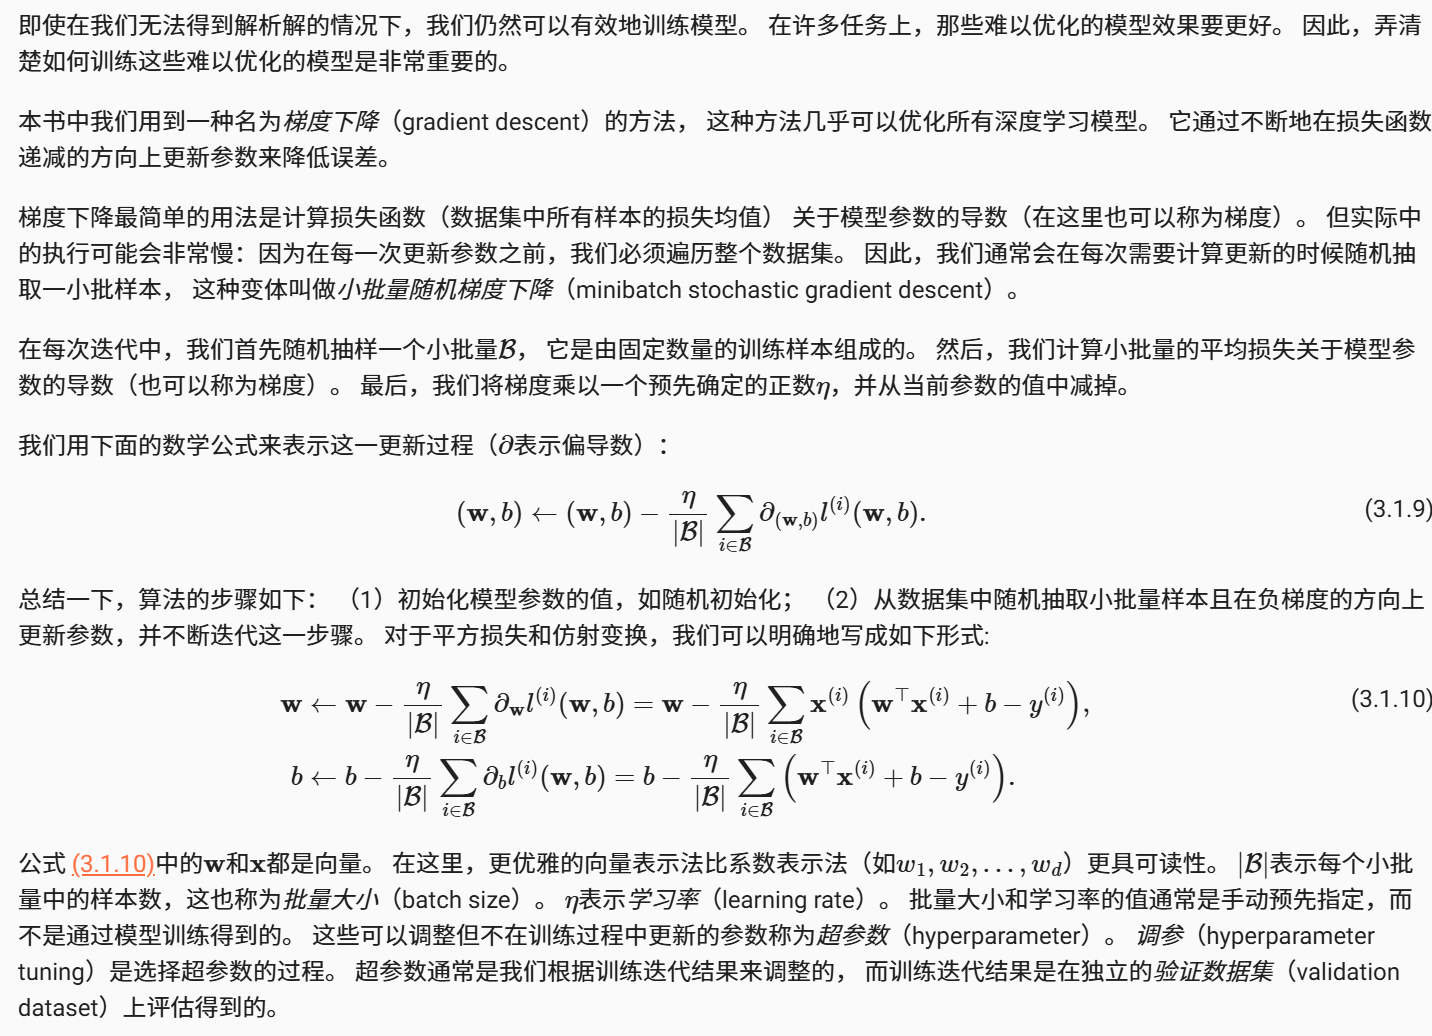

## 矢量化加速

%matplotlib inline
import math
import time
from mxnet import np
from d2l import mxnet as d2l
n = 10000
a = np.ones([n])
b = np.ones([n])

In [32]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

下面例子可以很好说明矢量化加速：

In [37]:
a = torch.tensor([2,1,1,9,3])
b = torch.tensor([3,4,8,7,0])
c = torch.arange(5)
timer = Timer()
for i in range (5):
    c[i] = a[i] + b[i]
print(f'{timer.stop():.6f}')

0.007066


In [41]:
timer.start()
c = a + b
f'{timer.stop():.6f}'

'0.000000'

# 线性回归的从零开始实现

In [7]:
%matplotlib inline
import random
from d2l import torch as d2l
import torch


X = torch.normal(0, 1, (num_examples, len(w)))  #使用 torch.normal 函数生成一个形状为 (num_examples, len(w)) 的矩阵 X。
                                                #每个元素来自均值为 0、标准差为 1 的正态分布。
#生成1000*2的矩阵

In [11]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 3.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features)
print([features[0],features[1]]) 

tensor([[ 5.3774e-01,  5.5528e-01],
        [-1.3358e-01, -2.0204e+00],
        [ 7.9601e-02,  6.7309e-01],
        ...,
        [-9.2832e-04,  3.2253e-01],
        [-2.6006e+00,  6.7113e-03],
        [ 9.8759e-01,  1.1246e+00]])
[tensor([0.5377, 0.5553]), tensor([-0.1336, -2.0204])]


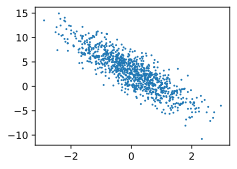

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1); #.detach()：从计算图中分离该张量，避免梯度计算。

## 读取数据集

我们需要一个函数能够打乱数据集中的样本并以小批量方式获取数据：

In [5]:
def data_iter(batch_size,features,labels):
    num_examples = len (features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    times = 0
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        print (batch_indices)
        times= times+1
        yield features[batch_indices] , labels[batch_indices],times 

num_examples = len(features)

计算输入数据的总样本数，即 features 的长度。
indices = list(range(num_examples))

创建一个包含从 0 到 num_examples - 1 的索引列表。
random.shuffle(indices)

随机打乱索引列表，这样可以在每个 epoch 中随机化数据顺序。
for i in range(0, num_examples, batch_size):

使用 for 循环按批量大小迭代数据，每次增加 batch_size。
range(0, num_examples, batch_size) 生成从 0 到 num_examples 的数列，间隔为 batch_size。
batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])

获取当前批次的索引，并将其转换为 torch 的张量（tensor）。
indices[i:min(i+batch_size, num_examples)]：这部分代码有效地处理了最后一个可能不足 batch_size 的批次。
yield features[batch_indices], labels[batch_indices]

使用 yield 关键字生成一个生成器，而不是一次性返回所有批次，这样可以节省内存并在需要时提供数据。
features[batch_indices] 和 labels[batch_indices] 分别返回当前批次的特征和标签。

batch_size = 10
for X,y,times in data_iter(batch_size,features,labels):
    print(X,'\n',y,'\n',times)
    break

 上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。 例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。 在深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据。

## 初始化模型参数

In [9]:
w = torch.normal(0,0.01,size=(2,2),requires_grad = True)
print(w)  # 行算一个样本的所有特征

tensor([[ 0.0037, -0.0140],
        [ 0.0074, -0.0125]], requires_grad=True)


## 定义模型

In [25]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b  # 记住点乘（？）是matmul

## 定义损失函数

In [3]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [ ]:
## 定义优化算法

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

在这个示例中，当使用 with torch.no_grad(): 时，所有在 with 代码块内部的操作都不会被 autograd 记录，从而有效地禁用了梯度计算。

通过使用 with 语句，在特定的代码块中管理资源和行为（如禁用梯度计算），使得代码更简洁、更安全并且易于阅读。

## 李宏毅的model

import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__() #在这段代码中，super(mymodel, self).__init__() 的作用是调用父类（即 nn.Module 类）的初始化方法。这是 Python 继承机制中的一个重要部分，
        #目的是确保父类的初始化方法被正确地调用，从而初始化父类中定义的所有属性。
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),              # 激活函数
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 10)     # 假设输出维度是 10
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.squeeze(1)# 移除维度为1的第二个维度
        return x
model = MyModel(input_dim=x_train.shape[1]).to('cuda')    


### 向前传播

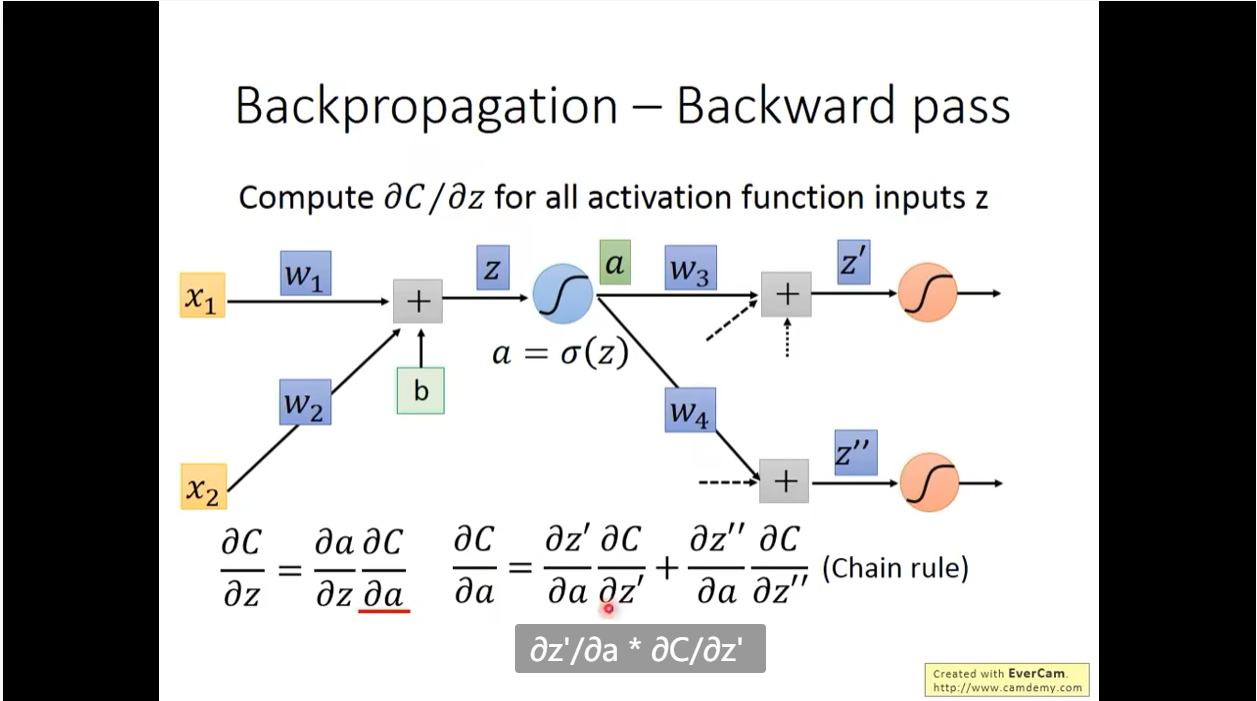

### 向后传播

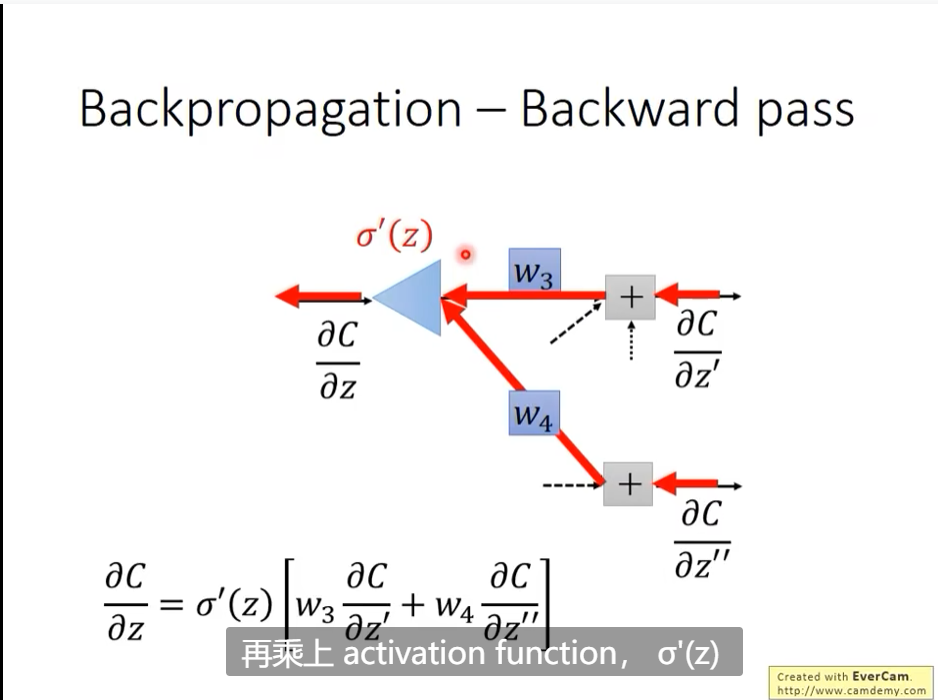

## 训练

In [8]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  #X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

NameError: name 'batch_size' is not defined

In [13]:
x = torch.arange(4.0)
x.requires_grad_(True)
y = x * x
print(y)
print(y.sum())
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor(14., grad_fn=<SumBackward0>)


tensor([0., 2., 4., 6.])

## 线性回归的简洁实现

In [39]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))
a,b = next(iter(data_iter))
print(a)
print(b)

tensor([[ 0.3339, -0.8791],
        [ 1.6722,  1.3598],
        [-1.2419, -1.7773],
        [-1.4943,  0.9318],
        [ 0.2841, -0.1876],
        [-0.8620, -0.5733],
        [-0.9425, -1.5848],
        [ 1.8655, -0.5796],
        [-0.1601, -0.4748],
        [-1.0364, -1.1264]])
tensor([[ 7.8687],
        [ 2.9177],
        [ 7.7576],
        [-1.9566],
        [ 5.4213],
        [ 4.4264],
        [ 7.7001],
        [ 9.9025],
        [ 5.5006],
        [ 5.9572]])


### 定义模型

In [27]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))  #nn.Linear(in_features, out_features, bias=True)
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()

tensor([0.])

### 定义优化算法

小批量随机梯度下降算法是一种优化神经网络的标准工具， PyTorch在optim模块中实现了该算法的许多变种。 当我们实例化一个SGD实例时，我们要指定优化的参数 （可通过net.parameters()从我们的模型中获得）以及优化算法所需的超参数字典。 小批量随机梯度下降只需要设置lr值，这里设置为0.03。

In [32]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) 

for param in net.parameters():
    print(f'参数值: {param}')

参数值: Parameter containing:
tensor([[-0.0003,  0.0117]], requires_grad=True)
参数值: Parameter containing:
tensor([0.], requires_grad=True)


In [33]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 2.0003, -3.4117])
b的估计误差： tensor([4.2000])


## softmax回归

### 分类问题

独热编码（one-hot encoding）。 独热编码是一个向量，它的分量和类别一样多。 类别对应的分量设置为1，其他所有分量设置为0。 在我们的例子中，标签
将是一个三维向量， 其中$(1,0,0)$
对应于“猫”、$(0,1,0)$
对应于“鸡”、$(0,0,1)$
对应于“狗”：
${\rm{y}} \in \left\{ {(1,0,0),(0,1,0),(0,0,1)} \right\}$

### 网络架构

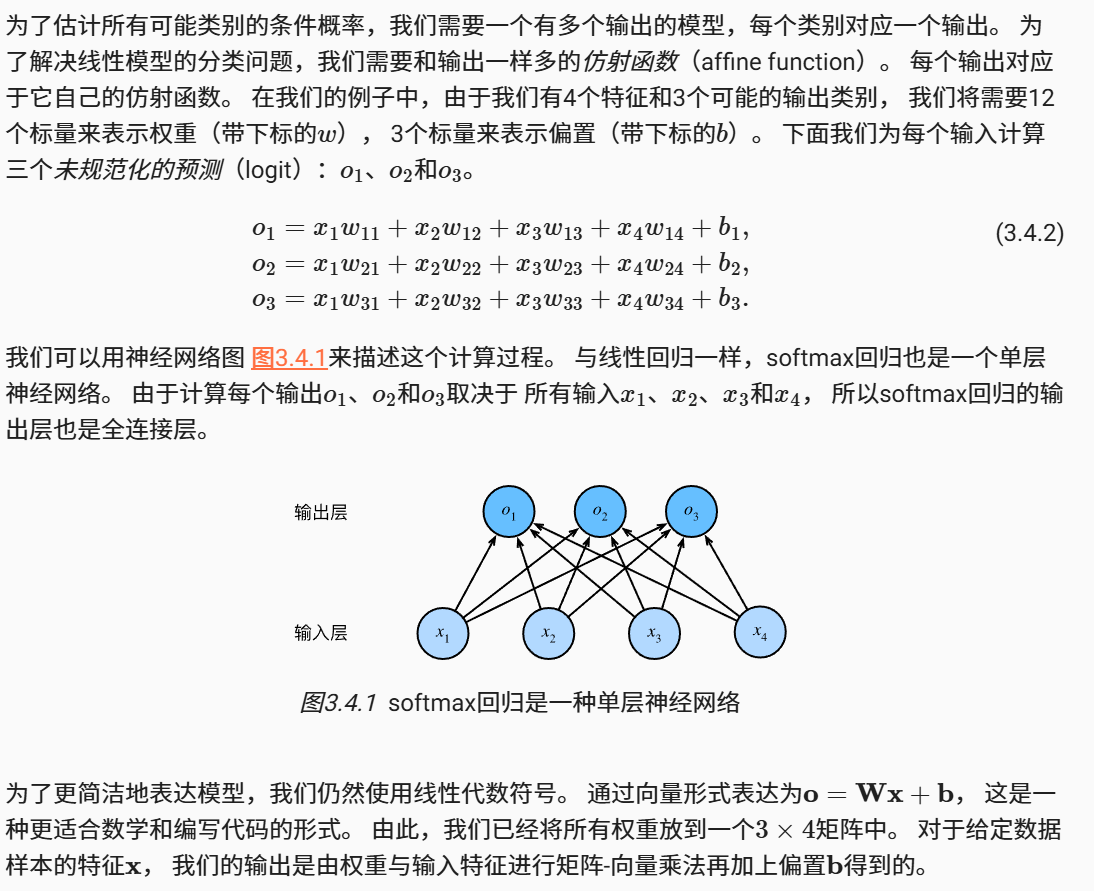

### softmax 回归

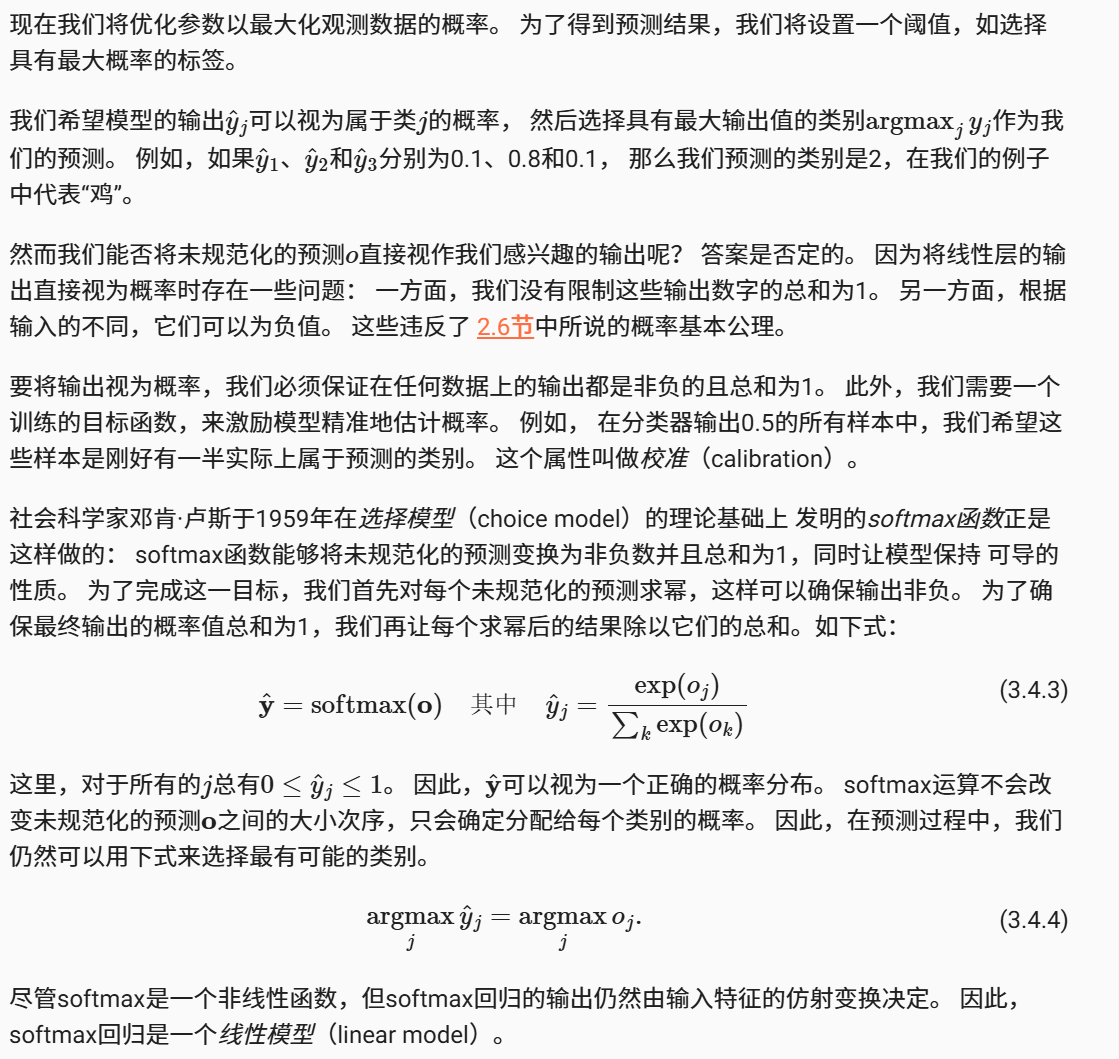

小批量样本矢量化，化简之后：
$\begin{array}{l}
{\bf{O}} = {\bf{XW}} + {\bf{b}}\\
{\bf{Y}}\_hat = soft\max ({\bf{O}})
\end{array}$

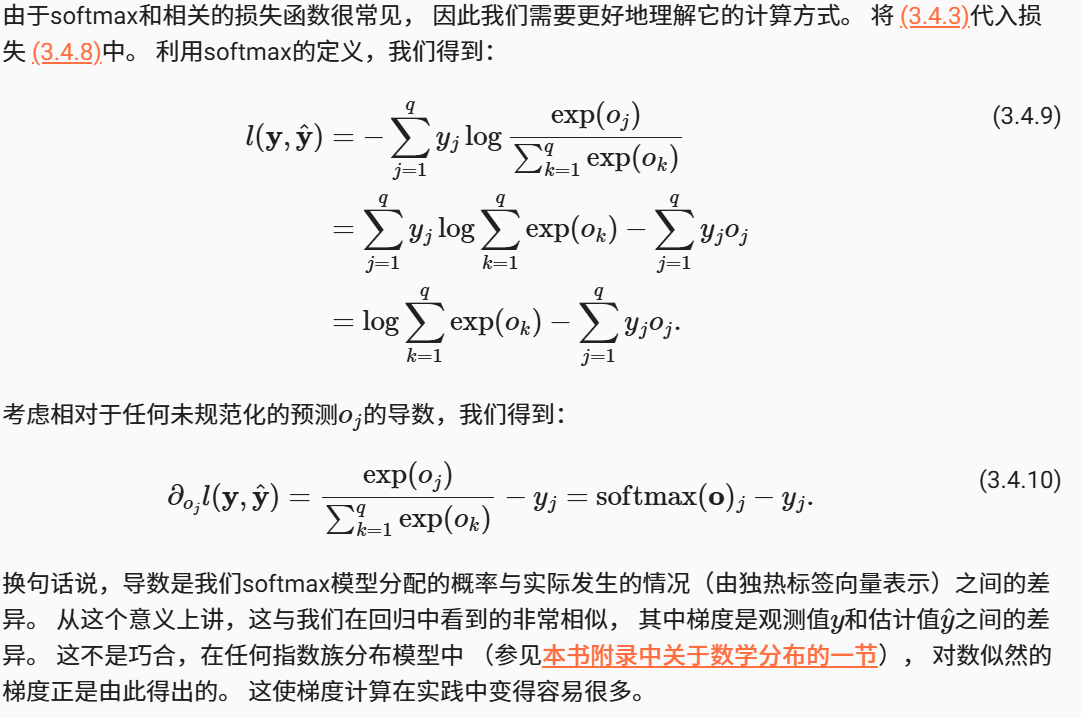

## 图像分类数据集

### 读取数据集

In [35]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

mnist_train[0][0].shape  #torch.Size([1, 28, 28])
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


例如：
labels = [0, 2, 9]  
text_labels = get_fashion_mnist_labels(labels)  
print(text_labels)  # 输出: ['t-shirt', 'pullover', 'ankle boot']

下面是创建函数可视化样本：

In [36]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)): # 会生成类似于 [(0, (ax1, img1)), (1, (ax2, img2)), (2, (ax3, img3))] 的元组序列
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

### 读取小批量

batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

mnist_train中包含60000个数据，第一个0表示其中的第一个数据。每个数据由一张图像和一个label构成。所以第二个0表示其中的图像部分。你可以尝试输出mnist_train[0][1]，你将会得到一个int，表示该图像对应的label。

### 整合所有组件

In [41]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

##  softmax回归的从零开始实现

In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### 定义softmax操作

In [43]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

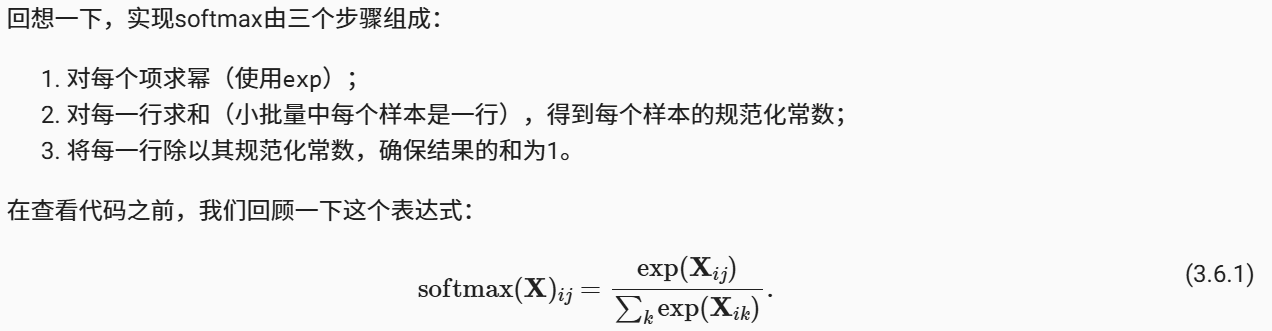

In [44]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2368, 0.0299, 0.3371, 0.3093, 0.0870],
         [0.0540, 0.4265, 0.1466, 0.1289, 0.2440]]),
 tensor([1., 1.]))

### 定义模型

In [45]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

### 定义损失函数

接下来，我们实现之前引入的交叉熵损失函数。 这可能是深度学习中最常见的损失函数，因为目前分类问题的数量远远超过回归问题的数量。

回顾一下，交叉熵采用真实标签的预测概率的负对数似然。 这里我们不使用Python的for循环迭代预测（这往往是低效的）， 而是通过一个运算符选择所有元素。 下面，我们创建一个数据样本y_hat，其中包含2个样本在3个类别的预测概率， 以及它们对应的标签y。 有了y，我们知道在第一个样本中，第一类是正确的预测； 而在第二个样本中，第三类是正确的预测。 然后使用y作为y_hat中概率的索引， 我们选择第一个样本中第一个类的概率和第二个样本中第三个类的概率。

In [49]:
#一个高级的索引方法：
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

y_hat[[0, 1], y] 中的高级索引操作：

y_hat[[0, 1]] 选择 y_hat 的第 0 行和第 1 行，这本身不会改变 y_hat ，仍然指向同样的数据。

索引 [0, 1] 和 y 索引数组 [0, 2] 的组合执行：

具体来说：

第 0 行的第 0 列元素是 0.1。
第 1 行的第 2 列元素是 0.5。
所以，执行结果 y_hat[[0, 1], y]，将会给出：

[0.1, 0.5]

这不需要使用循环，可以快速取出任意位置的元素。

In [51]:
def cross_entropy(y_hat, y):
    print(y_hat[range(len(y_hat)), y])
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([0.1000, 0.5000])


tensor([2.3026, 0.6931])

### 分类精度

为了计算精度，我们执行以下操作。 首先，如果y_hat是矩阵，那么假定第二个维度存储每个类的预测分数。 我们使用argmax获得每行中最大元素的索引来获得预测类别。 然后我们将预测类别与真实y元素进行比较。 由于等式运算符“==”对数据类型很敏感， 因此我们将y_hat的数据类型转换为与y的数据类型一致。 结果是一个包含0（错）和1（对）的张量。 最后，我们求和会得到正确预测的数量。

In [57]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
        print(y_hat)
        print(y,dtype)
    cmp = y_hat.type(y.dtype) == y  #y_hat.type(y.dtype) 转换y_hat 的数据类型
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

 **函数定义**

accuracy(y_hat, y) 是一个函数，它有两个输入参数：
y_hat: 模型的预测输出。
y: 实际的标签（ground truth）。

 **Step 1: 处理多类预测**

if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
检查 y_hat 的形状，如果 y_hat 是一个二维张量且其第二维的大小大于1（即预测包括多个类别的概率或分数，如 [batch_size, num_classes]），我们使用 argmax(axis=1) 获取预测的类别索引。
y_hat.argmax(axis=1) 会返回每个样本预测类别的索引（取值范围是 [0, num_classes-1]）而不是各类别的概率。

 **Step 2: 比较预测和实际标签**

cmp = y_hat.type(y.dtype) == y
将 y_hat 转换为与 y 相同的数据类型（通过 type(y.dtype)），然后与 y 进行逐元素比较，得到一个布尔张量 cmp，表示预测与实际标签是否匹配。
 
 **Step 3: 计算正确的数量**

return float(cmp.type(y.dtype).sum())
cmp 是一个布尔张量，我们将其转为与 y 相同的数据类型（通常是整数或浮点数），然后对其求和。
转为布尔张量之后，True 值将成为1，False 值将成为0。
cmp.type(y.dtype).sum() 会得到预测正确的数量。
最后将结果转换为浮点数并返回。

同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度。

In [ ]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

#### dtype 和 type 的区别

In [ ]:
在PyTorch中，dtype 和 type 是两个不同的概念，具有不同的用途。

### dtype 和 type 的区别

#### dtype

dtype 是 PyTorch 张量的一个属性，用于表示张量中元素的数据类型。
常用的 dtype 值包括 torch.float32, torch.float64, torch.int32, torch.int64 等。
通过 y.dtype 可以获取张量 y 的数据类型。
使用 y.to(dtype) 或 y.type(dtype) 可以转换张量的数据类型。
例子：

import torch

# 创建一个张量
y = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)

# 打印 dtype
print(y.dtype)  # 输出: torch.float32

# 转换 dtype
y_int = y.to(torch.int32)
print(y_int.dtype)  # 输出: torch.int32
#### type

type 是 PyTorch 张量的一个方法，用于返回张量的类名字符串，或改变张量的数据类型。
y.type() 返回张量的类型字符串。
y.type(new_type) 可以将张量的类型转换为 new_type。
例子：

# 继续使用上面的张量 y
print(y.type())  # 输出: 'torch.FloatTensor'

# 转换类型
y_int = y.type(torch.IntTensor)
print(y_int.type())  # 输出: 'torch.IntTensor'
### type(y)

这是 Python 的内置函数 type()，用于返回对象的类型。
对于 PyTorch 张量，它会返回 <class 'torch.Tensor'> 或其具体子类，如 <class 'torch.FloatTensor'>。
例子：

# 继续使用上面的张量 y
print(type(y))  # 输出: <class 'torch.Tensor'>
### 总结

dtype 是一个属性，表示张量的数据类型。
type() 是一个方法，可以返回张量的类型字符串，还可以用于改变张量的数据类型。
type(y) 是Python的内置函数，返回对象的类型信息。

In [58]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
        
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [ ]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### logsumexp技巧让softmax更稳定


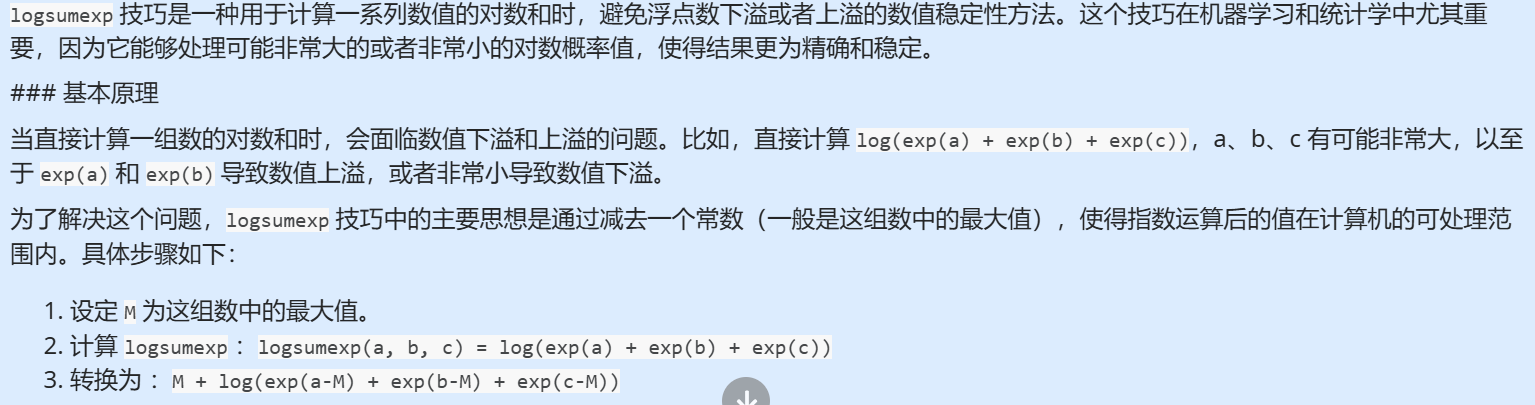

# 多层感知机